# 비지도 학습 실제사례
이미지 데이터에 K-means Clustering 적용

# 1. 이미지 처리 기초
* 이미지는 픽셀(pixel)이라고 하는 작은 이미지를 직사각형 형태로 모은 것
* 각 픽셀은 단색의 직사각형으로 전체 이미지의 크기를 표현할 때는 (세로픽셀수 x 가로픽셀수) 형식으로 표현
* 이미지 데이터를 저장할 때 픽셀의 색을 표현하는 스칼라 값 or 벡터를 2차원 배열로 표현
* 색공간(color space): 픽셀의 색을 숫자로 표현하는 방식
* 대표적으로 그레이스케일(gray scale), RGB(Red-Green-Blue), HSV(Hue-Saturation-Value)이 존재
* 색은 0~255사이의 숫자로 지정

(80, 150, 3)
가장 처음 픽셀의 r g b 값은 : [24 42 42] 입니다


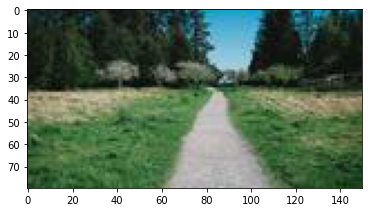

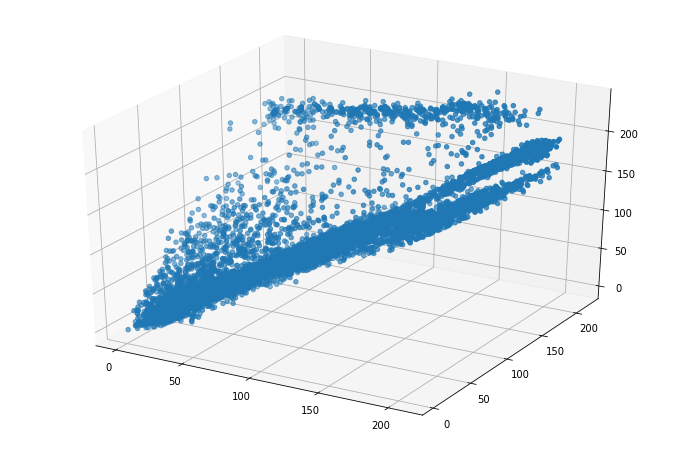

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

# url로 된 이미지 불러오기
image = imageio.imread('https://picsum.photos/id/17/150/80')

# 이미지를 numpy array로 변환 - 이미 되어 있음
# image_array = np.array(image)

# 이미지의 shape 확인
print(image.shape)
# (80, 150, 3) height, width, color(rgb)

plt.imshow(image)

# 이미지는 80*150의 데이터가 3장(rgb)으로 표현되어 있는 상태
print('가장 처음 픽셀의 r g b 값은 :', image[0][0], '입니다')

# rgb_list에 픽셀의 rgb 데이터를 각각 집어넣기
rgb_list = []

for i in image:
    for j in i:
        rgb_list.append(j.tolist())

# 각 픽셀의 rgb 배열을 확인하기 위해 3차원 그래프 그리기
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = []
y = []
z = []
# r, g, b를 각각 추출해 x,y,z리스트에 집어넣고
for r, g, b in rgb_list:
    x.append(r)
    y.append(g)
    z.append(b)

# 그래프 그리기
ax.scatter(x, y, z)
plt.show()

#### 다른 그림

(80, 150, 3)
가장 처음 픽셀의 r g b 값은 : [85 74 72] 입니다


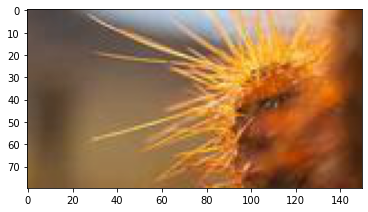

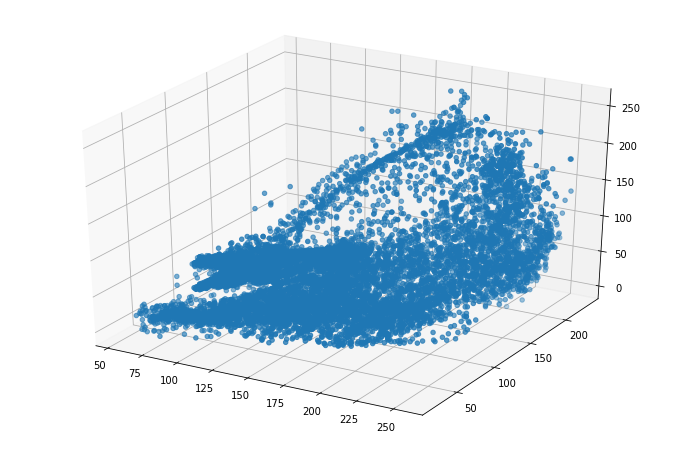

In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

# url로 된 이미지 불러오기
image = imageio.imread('https://picsum.photos/id/35/150/80')

# 이미지를 numpy array로 변환 - 이미 되어 있음
# image_array = np.array(image)

# 이미지의 shape 확인
print(image.shape)
# (80, 150, 3) height, width, color(rgb)

plt.imshow(image)

# 이미지는 80*150의 데이터가 3장(rgb)으로 표현되어 있는 상태
print('가장 처음 픽셀의 r g b 값은 :', image[0][0], '입니다')

# rgb_list에 픽셀의 rgb 데이터를 각각 집어넣기
rgb_list = []

for i in image:
    for j in i:
        rgb_list.append(j.tolist())

# 각 픽셀의 rgb 배열을 확인하기 위해 3차원 그래프 그리기
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = []
y = []
z = []
# r, g, b를 각각 추출해 x,y,z리스트에 집어넣고
for r, g, b in rgb_list:
    x.append(r)
    y.append(g)
    z.append(b)

# 그래프 그리기
ax.scatter(x, y, z)
plt.show()

# 2. K-means 알고리즘 적용

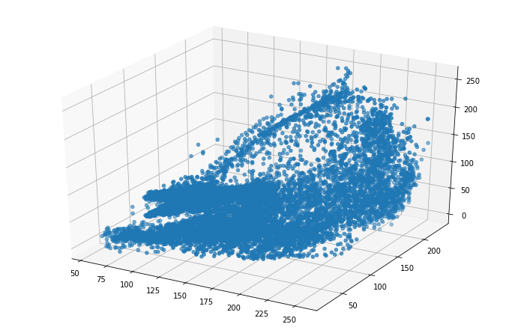

### 픽셀의 색이 위와 같이 분포를 이룰 때 군집은 어떻게 형성이 될까?
* K-means알고리즘은 데이터를 K개의 군집(Cluster)으로 묶는 알고리즘
* 그러므로 이미지에서 K개의 군집을 구한다면 주로 사용된 color palette를 구할 수 있음
* 만약 k=1이라면 이미지에서 가장 두드러지는 색 하나를 구할 수 있고
* k=3이라면 이미지에서 가장 두드러지는 3개의 색을 구할 수 있음

# 4. 라이브러리 및 데이터 불러오기

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import cv2
from PIL import Image

In [4]:
import imageio
image1 = imageio.imread('https://picsum.photos/id/17/150/80')

# 5. 데이터 전처리

In [5]:
# shape 확인
image1.shape

(80, 150, 3)

In [6]:
# 3D 배열(높이, 넓이, 색)을 2D배열(픽셀번호, 색)으로 변경
pixels = image1.reshape((-1,3))
pixels.shape

(12000, 3)

In [7]:
# 최솟값, 평균, 최댓값 조회
pixels.min(), pixels.mean(), pixels.max()

(0, 83.84825, 235)

In [8]:
# 0~255까지의 숫자를 0~1사이의 숫자로 정규화
pixels = pixels.astype("float32") / 255

# 최솟값, 평균, 최댓값 조회
pixels.min(), pixels.mean(), pixels.max()

(0.0, 0.32881668, 0.92156863)

# 6. 데이터 시각화
히스토그램으로 색이 어떻게 분포되었는지 확인

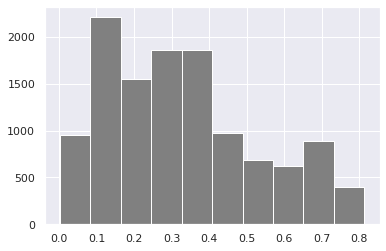

In [9]:
# 1로 갈수록 진한 색
# 이미지에서 색이 얼마나 진한지 확인
plt.hist(
    pixels.mean(1),
    color="grey"
);

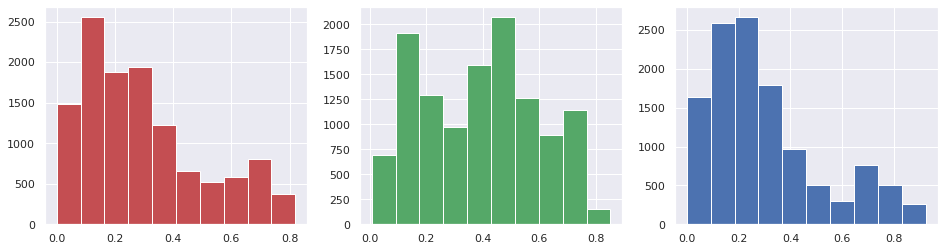

In [10]:
# r,g,b 배열
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.hist(
    pixels[:,0],
    color="r"
)
plt.subplot(1,3,2)
plt.hist(
    pixels[:,1],
    color="g"
)
plt.subplot(1,3,3)
plt.hist(
    pixels[:,2],
    color="b"
);

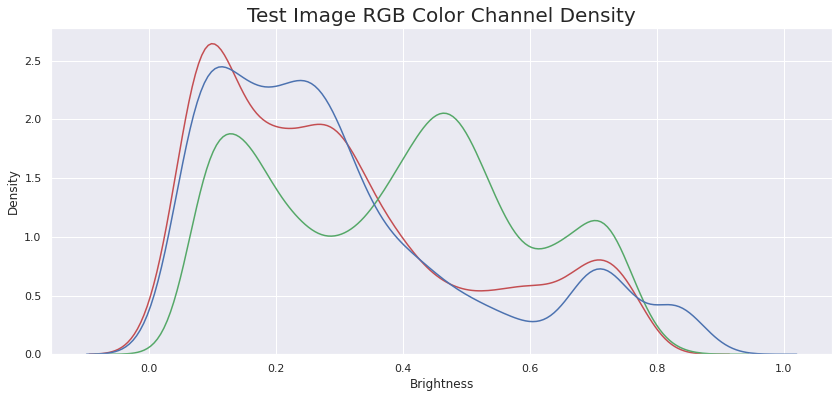

In [11]:
plt.figure(figsize=(14,6))
sns.kdeplot(
    pixels[:,0],
    color="r"
)
sns.kdeplot(
    pixels[:,1],
    color="g"
)
sns.kdeplot(
    pixels[:,2],
    color="b"
)
plt.xlabel("Brightness")
plt.ylabel("Density")
plt.title(
    "Test Image RGB Color Channel Density",
    fontsize=20
);

#7. K-means 알고리즘

In [12]:
from sklearn.cluster import KMeans

In [13]:
# k를 8로 지정해 가장 많이 쓰인 색 8개 조회
kmeans = KMeans(n_clusters=8)
predictions = kmeans.fit_predict(pixels)
centers = kmeans.cluster_centers_

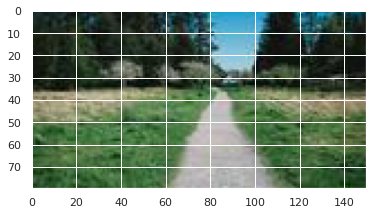

In [14]:
plt.imshow(image1)
plt.show()

In [15]:
# 8개의 color pallete를 지정하는 rgb 조합은 다음과 같다
print('0~1 숫자로 나타내기')
print(centers)
print()
print('0~255 숫자로 나타내기')
list(map(np.round, centers*255))

0~1 숫자로 나타내기
[[0.204943   0.3486731  0.21628061]
 [0.7018574  0.7211923  0.7167161 ]
 [0.4300189  0.52215374 0.36995584]
 [0.07457119 0.11029842 0.07704717]
 [0.2846119  0.66372156 0.79810137]
 [0.30025524 0.45392612 0.27839258]
 [0.60266936 0.61287326 0.491346  ]
 [0.13423859 0.21020262 0.15195532]]

0~255 숫자로 나타내기


[array([52., 89., 55.], dtype=float32),
 array([179., 184., 183.], dtype=float32),
 array([110., 133.,  94.], dtype=float32),
 array([19., 28., 20.], dtype=float32),
 array([ 73., 169., 204.], dtype=float32),
 array([ 77., 116.,  71.], dtype=float32),
 array([154., 156., 125.], dtype=float32),
 array([34., 54., 39.], dtype=float32)]

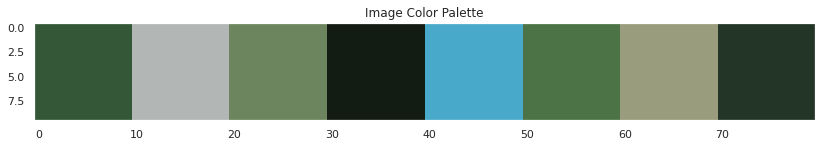

In [16]:
plt.figure(figsize=(14,8))
plt.imshow(centers[np.concatenate([[i] * 100 for i in range(len(centers))]).reshape((-1,10)).T])
plt.title("Image Color Palette")
plt.grid()

* k를 1부터 증가시키며 color pallete가 어떻게 변하는지 관찰

In [17]:
# 함수 적용
def kmeans_nclusters(n=8):
    return KMeans(n_clusters=n).fit(pixels).cluster_centers_

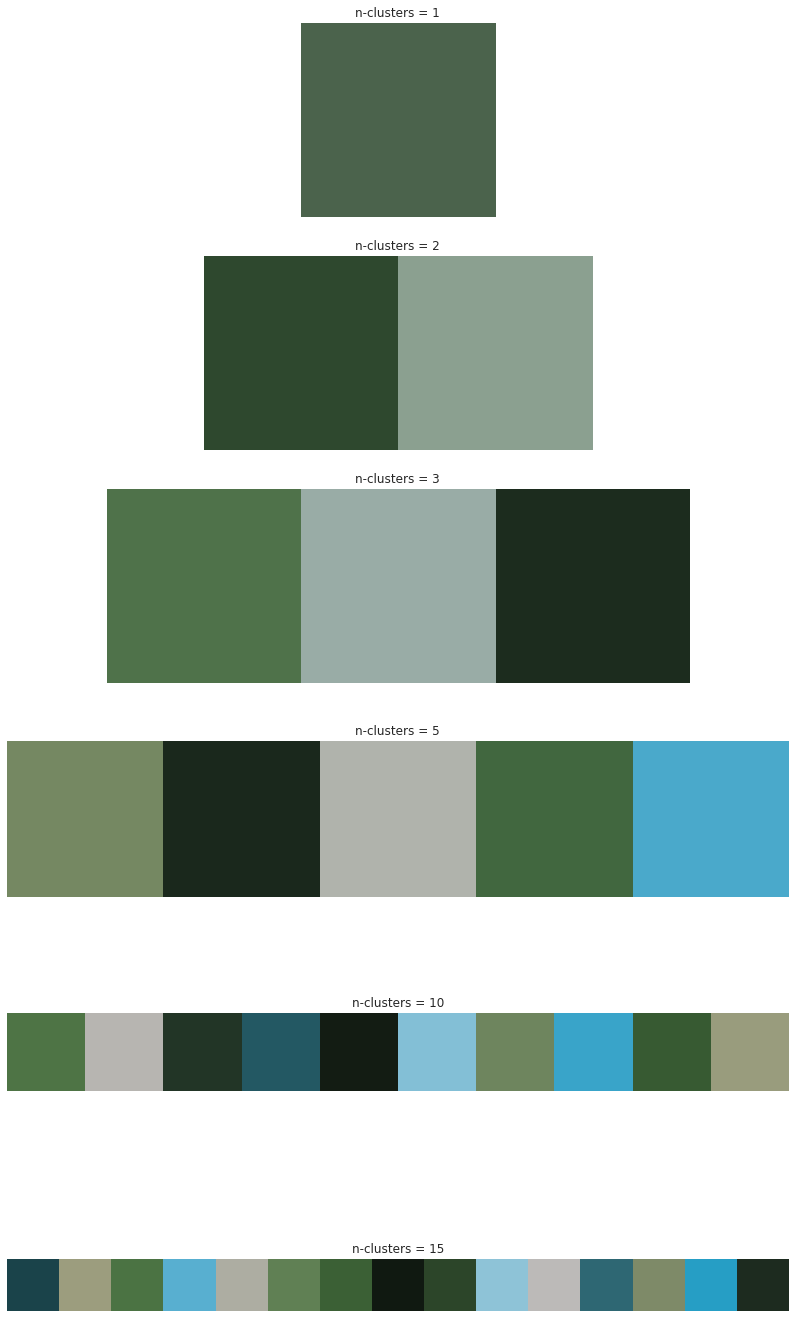

In [18]:
plt.figure(figsize=(14,25))
palette_sizes = [1,2,3,5,10,15]
for i, s in enumerate(palette_sizes):
    plt.subplot(len(palette_sizes),1,i+1)
    kmcenters = kmeans_nclusters(s)    
    plt.imshow(kmcenters[np.concatenate([[i] * 100 for i in range(len(kmcenters))]).reshape((-1,10)).T])
    plt.title(f"n-clusters = {s}")
    plt.grid()
    plt.axis('off')
plt.show()

#8. 함수 설정

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import cv2
from PIL import Image

from sklearn.cluster import KMeans

# 이미지 입력은 array 형태
# n_clusters 는 cluster 개수 지정
def color_palette(input_image, n_clusters=8):
    pixels = input_image.reshape((-1,3))
    pixels.shape

    pixels = pixels.astype("float32") / 255

    kmeans = KMeans(n_clusters)
    predictions = kmeans.fit_predict(pixels)
    centers = kmeans.cluster_centers_

    plt.figure(figsize=(14,8))
    plt.imshow(centers[np.concatenate([[i] * 100 for i in range(len(centers))]).reshape((-1,10)).T])
    plt.title("Image Color Palette")
    plt.grid()

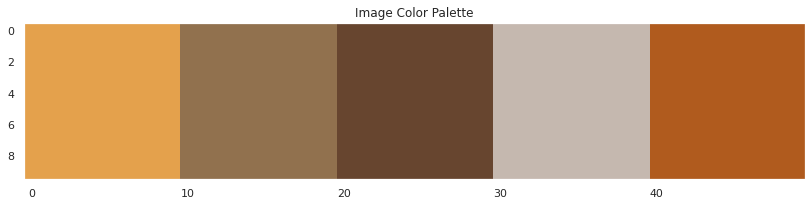

In [20]:
image2 = imageio.imread('https://picsum.photos/id/35/150/80')
color_palette(image2, n_clusters=5)